In [435]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


In [436]:
df = pd.read_csv('listings.csv')

In [437]:
clean_listing = df.copy()

####  Data Cleaning

In [438]:
# removing the columns which have more 50% missing values
columns = clean_listing.columns[clean_listing.isnull().sum()/clean_listing.shape[0] > 0.5]
clean_listing.drop(columns, axis=1, inplace=True)


In [439]:
# dropping columns 'host_name' and 'host_since' as they are PII
clean_listing.drop(['host_name', 'host_since'], axis=1, inplace=True)

In [440]:
clean_listing.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,15965441,within an hour,83%,0%,f,3.0,t,t,Cocotá,-22.80630,...,$150.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
1,47908784,within a day,50%,100%,f,1.0,t,f,Freguesia (Jacarepaguá),-22.93633,...,$450.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
2,52239613,within a day,100%,89%,f,0.0,t,f,Curicica,-22.96253,...,$350.00,5.00,5.00,5.00,4.89,4.78,4.78,4.89,f,1.16
3,10445855,within an hour,100%,100%,f,2.0,t,t,Vila Militar,-22.87969,...,$145.00,4.78,4.91,4.89,4.93,4.87,4.70,4.57,f,0.64
4,5.65405E+17,within an hour,100%,67%,f,0.0,t,t,Del Castilho,-22.88168,...,$180.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN


### Add 0 to null values for the following columns

In [441]:
columns_to_clean = ['reviews_per_month', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
clean_listing[columns_to_clean] = clean_listing[columns_to_clean].fillna(0)
clean_listing

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,15965441,within an hour,83%,0%,f,3.0,t,t,Cocotá,-22.80630,...,$150.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00
1,47908784,within a day,50%,100%,f,1.0,t,f,Freguesia (Jacarepaguá),-22.93633,...,$450.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00
2,52239613,within a day,100%,89%,f,0.0,t,f,Curicica,-22.96253,...,$350.00,5.00,5.00,5.00,4.89,4.78,4.78,4.89,f,1.16
3,10445855,within an hour,100%,100%,f,2.0,t,t,Vila Militar,-22.87969,...,$145.00,4.78,4.91,4.89,4.93,4.87,4.70,4.57,f,0.64
4,5.65405E+17,within an hour,100%,67%,f,0.0,t,t,Del Castilho,-22.88168,...,$180.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24881,6.03404E+17,within a day,100%,NaN,f,1.0,t,t,Santa Teresa,-22.92152,...,$330.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00
24882,54183633,within a few hours,100%,98%,f,0.0,t,t,Camorim,-22.97643,...,$188.00,3.75,4.75,5.00,4.25,3.50,4.75,3.75,f,0.78
24883,23033490,within an hour,100%,98%,t,3.0,t,t,Leme,-22.96449,...,$89.00,4.92,4.97,4.92,4.98,4.98,5.00,4.94,f,1.47
24884,2341248,a few days or more,0%,100%,f,1.0,t,f,Botafogo,-22.95310,...,$536.00,4.50,4.83,4.17,4.83,5.00,4.67,4.33,f,0.10


### Drop Null Values

In [442]:
clean_listing=clean_listing.dropna()
clean_listing

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,15965441,within an hour,83%,0%,f,3.0,t,t,Cocotá,-22.80630,...,$150.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00
1,47908784,within a day,50%,100%,f,1.0,t,f,Freguesia (Jacarepaguá),-22.93633,...,$450.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00
2,52239613,within a day,100%,89%,f,0.0,t,f,Curicica,-22.96253,...,$350.00,5.00,5.00,5.00,4.89,4.78,4.78,4.89,f,1.16
3,10445855,within an hour,100%,100%,f,2.0,t,t,Vila Militar,-22.87969,...,$145.00,4.78,4.91,4.89,4.93,4.87,4.70,4.57,f,0.64
4,5.65405E+17,within an hour,100%,67%,f,0.0,t,t,Del Castilho,-22.88168,...,$180.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24880,54032578,within an hour,100%,93%,f,0.0,t,t,Centro,-22.90949,...,$220.00,5.00,5.00,5.00,5.00,5.00,4.93,5.00,f,2.46
24882,54183633,within a few hours,100%,98%,f,0.0,t,t,Camorim,-22.97643,...,$188.00,3.75,4.75,5.00,4.25,3.50,4.75,3.75,f,0.78
24883,23033490,within an hour,100%,98%,t,3.0,t,t,Leme,-22.96449,...,$89.00,4.92,4.97,4.92,4.98,4.98,5.00,4.94,f,1.47
24884,2341248,a few days or more,0%,100%,f,1.0,t,f,Botafogo,-22.95310,...,$536.00,4.50,4.83,4.17,4.83,5.00,4.67,4.33,f,0.10


### need to convert the columns ['host_response_rate', 'host_acceptance_rate', 'price'] from df object to int64

In [443]:
columns = ['host_response_rate', 'host_acceptance_rate', 'price']

clean_listing[columns].dtypes

host_response_rate      object
host_acceptance_rate    object
price                   object
dtype: object

In [444]:
def df_col_str_int(df, col):
    """
    Convert a column of strings to an integer column.
    @param df - the dataframe containing the column to convert
    @param col - the column to convert
    @return the dataframe with the column converted
    """
    try:
        df[col] = df[col].str.extract(r'(\d+)')
        df[col] = df[col].astype('float64')
        return df
    except AttributeError:
        return df

In [445]:
for col in ['host_response_rate', 'host_acceptance_rate', 'price']:
    clean_listing = df_col_str_int(clean_listing, col)


/var/folders/sb/01h9w7kd6pd17pjzy_5jc4gw0000gn/T/ipykernel_77389/631168114.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.extract(r'(\d+)')
/var/folders/sb/01h9w7kd6pd17pjzy_5jc4gw0000gn/T/ipykernel_77389/631168114.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('float64')
/var/folders/sb/01h9w7kd6pd17pjzy_5jc4gw0000gn/T/ipykernel_77389/631168114.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

#### Function output

In [446]:
clean_listing[columns].dtypes

host_response_rate      float64
host_acceptance_rate    float64
price                   float64
dtype: object

### Converting % to number

In [447]:

"""
   Normalize the host response and acceptance rate columns.
   @param clean_listing - the clean listing dataframe
   @returns the normalized dataframe
"""
clean_listing['host_response_rate'] = clean_listing['host_response_rate'].apply(lambda x: x /100 )
clean_listing['host_acceptance_rate'] = clean_listing['host_acceptance_rate'].apply(lambda x: x /100 )


/var/folders/sb/01h9w7kd6pd17pjzy_5jc4gw0000gn/T/ipykernel_77389/3005594175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_listing['host_response_rate'] = clean_listing['host_response_rate'].apply(lambda x: x /100 )
/var/folders/sb/01h9w7kd6pd17pjzy_5jc4gw0000gn/T/ipykernel_77389/3005594175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_listing['host_acceptance_rate'] = clean_listing['host_acceptance_rate'].apply(lambda x: x /100 )


In [448]:
clean_listing

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,15965441,within an hour,0.83,0.00,f,3.0,t,t,Cocotá,-22.80630,...,150.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00
1,47908784,within a day,0.50,1.00,f,1.0,t,f,Freguesia (Jacarepaguá),-22.93633,...,450.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00
2,52239613,within a day,1.00,0.89,f,0.0,t,f,Curicica,-22.96253,...,350.0,5.00,5.00,5.00,4.89,4.78,4.78,4.89,f,1.16
3,10445855,within an hour,1.00,1.00,f,2.0,t,t,Vila Militar,-22.87969,...,145.0,4.78,4.91,4.89,4.93,4.87,4.70,4.57,f,0.64
4,5.65405E+17,within an hour,1.00,0.67,f,0.0,t,t,Del Castilho,-22.88168,...,180.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24880,54032578,within an hour,1.00,0.93,f,0.0,t,t,Centro,-22.90949,...,220.0,5.00,5.00,5.00,5.00,5.00,4.93,5.00,f,2.46
24882,54183633,within a few hours,1.00,0.98,f,0.0,t,t,Camorim,-22.97643,...,188.0,3.75,4.75,5.00,4.25,3.50,4.75,3.75,f,0.78
24883,23033490,within an hour,1.00,0.98,t,3.0,t,t,Leme,-22.96449,...,89.0,4.92,4.97,4.92,4.98,4.98,5.00,4.94,f,1.47
24884,2341248,a few days or more,0.00,1.00,f,1.0,t,f,Botafogo,-22.95310,...,536.0,4.50,4.83,4.17,4.83,5.00,4.67,4.33,f,0.10


In [449]:
from scipy.stats import ttest_ind

In [450]:
"""
    Perform a t-test on the accommodates and reviews_per_month listings.
    @param clean_listing - the cleaned listing dictionary
    @returns the t-test statistic and p-value
"""

stat, p = ttest_ind(clean_listing['accommodates'], clean_listing['reviews_per_month'])    


In [451]:
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Test hypothesis true')
else:
 print('Test hypothesis false')

stat=174.762, p=0.000
Test hypothesis false


In [452]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [453]:
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [454]:
#
def df_category_cleaner(df, col):
    """
    Clean the dataframe by filling in missing values with 'None' and converting the categories
    to numerical values.
    @param df - the dataframe to clean
    @param col - the column to clean
    @return the cleaned dataframe
    """
    try:
        df[col] = df[col].fillna('None')
        df[col] = label_encoder.fit_transform(df[col])
        df[col]= df[col].astype('category')
        return df
    except:
        return df

In [455]:
categorical_columns_clean = ['property_type', 'room_type', 'bathrooms_text', 'instant_bookable', 'host_identity_verified', 'host_has_profile_pic', 'host_is_superhost', 'host_response_time', 'neighbourhood_cleansed']
for column in categorical_columns_clean:
    clean_listing = df_category_cleaner(clean_listing, column)

/var/folders/sb/01h9w7kd6pd17pjzy_5jc4gw0000gn/T/ipykernel_77389/993067746.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('None')
/var/folders/sb/01h9w7kd6pd17pjzy_5jc4gw0000gn/T/ipykernel_77389/993067746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
/var/folders/sb/01h9w7kd6pd17pjzy_5jc4gw0000gn/T/ipykernel_77389/993067746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [456]:
df_num = clean_listing.select_dtypes(include=['int', 'Int64', 'float','category'])

In [457]:

"""
Drop the latitude and longitude columns and convert the rest of the dataframe to float.
@param df_num - the dataframe containing the numerical data           
@return the dataframe with the latitude and longitude columns dropped and converted to float
"""
df_num = df_num.drop(['latitude', 'longitude'], axis=1).astype(float)

In [458]:
corrmat = df_num.corr()
corrmat

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
host_response_time,1.000000,0.751275,0.531654,0.304410,0.075584,0.025071,0.175824,-0.043149,-0.089966,-0.091620,...,-0.035343,0.170292,0.171581,0.174714,0.167475,0.170608,0.167420,0.173284,0.242760,0.303259
host_response_rate,0.751275,1.000000,0.501076,0.245677,0.075267,0.034632,0.179223,-0.049150,-0.090681,-0.091363,...,-0.034366,0.209288,0.210049,0.211644,0.206575,0.208309,0.205005,0.208904,0.110650,0.228750
host_acceptance_rate,0.531654,0.501076,1.000000,0.277235,-0.012688,-0.023850,0.125731,-0.017848,-0.042536,-0.037378,...,-0.046158,0.237873,0.237415,0.239233,0.234601,0.235425,0.235043,0.242453,0.395718,0.338719
host_is_superhost,0.304410,0.245677,0.277235,1.000000,0.124213,0.049688,0.130428,-0.023608,-0.090690,-0.096965,...,-0.041796,0.174102,0.171552,0.176388,0.162369,0.165998,0.159633,0.172401,0.044193,0.318862
host_total_listings_count,0.075584,0.075267,-0.012688,0.124213,1.000000,0.023134,0.121635,-0.015448,-0.073792,-0.100662,...,0.057788,-0.141781,-0.140072,-0.140954,-0.142232,-0.143906,-0.136982,-0.145091,-0.067219,-0.063919
host_has_profile_pic,0.025071,0.034632,-0.023850,0.049688,0.023134,1.000000,0.046653,-0.015713,0.024342,0.022262,...,0.008562,0.039922,0.039194,0.041485,0.038953,0.039176,0.034926,0.037571,-0.050703,0.008298
host_identity_verified,0.175824,0.179223,0.125731,0.130428,0.121635,0.046653,1.000000,-0.019881,-0.086496,-0.099361,...,0.015225,0.033490,0.035372,0.034100,0.033082,0.033904,0.036496,0.032633,0.018755,0.100469
neighbourhood_cleansed,-0.043149,-0.049150,-0.017848,-0.023608,-0.015448,-0.015713,-0.019881,1.000000,0.102488,0.134744,...,-0.043665,-0.035471,-0.038471,-0.035683,-0.038492,-0.036277,-0.050696,-0.036437,0.021959,-0.054445
property_type,-0.089966,-0.090681,-0.042536,-0.090690,-0.073792,0.024342,-0.086496,0.102488,1.000000,0.928710,...,-0.222815,-0.039684,-0.042869,-0.040173,-0.042430,-0.042723,-0.046824,-0.033187,0.046820,-0.097373
room_type,-0.091620,-0.091363,-0.037378,-0.096965,-0.100662,0.022262,-0.099361,0.134744,0.928710,1.000000,...,-0.242476,-0.047124,-0.051791,-0.048066,-0.050329,-0.050228,-0.056971,-0.039220,0.048316,-0.103997


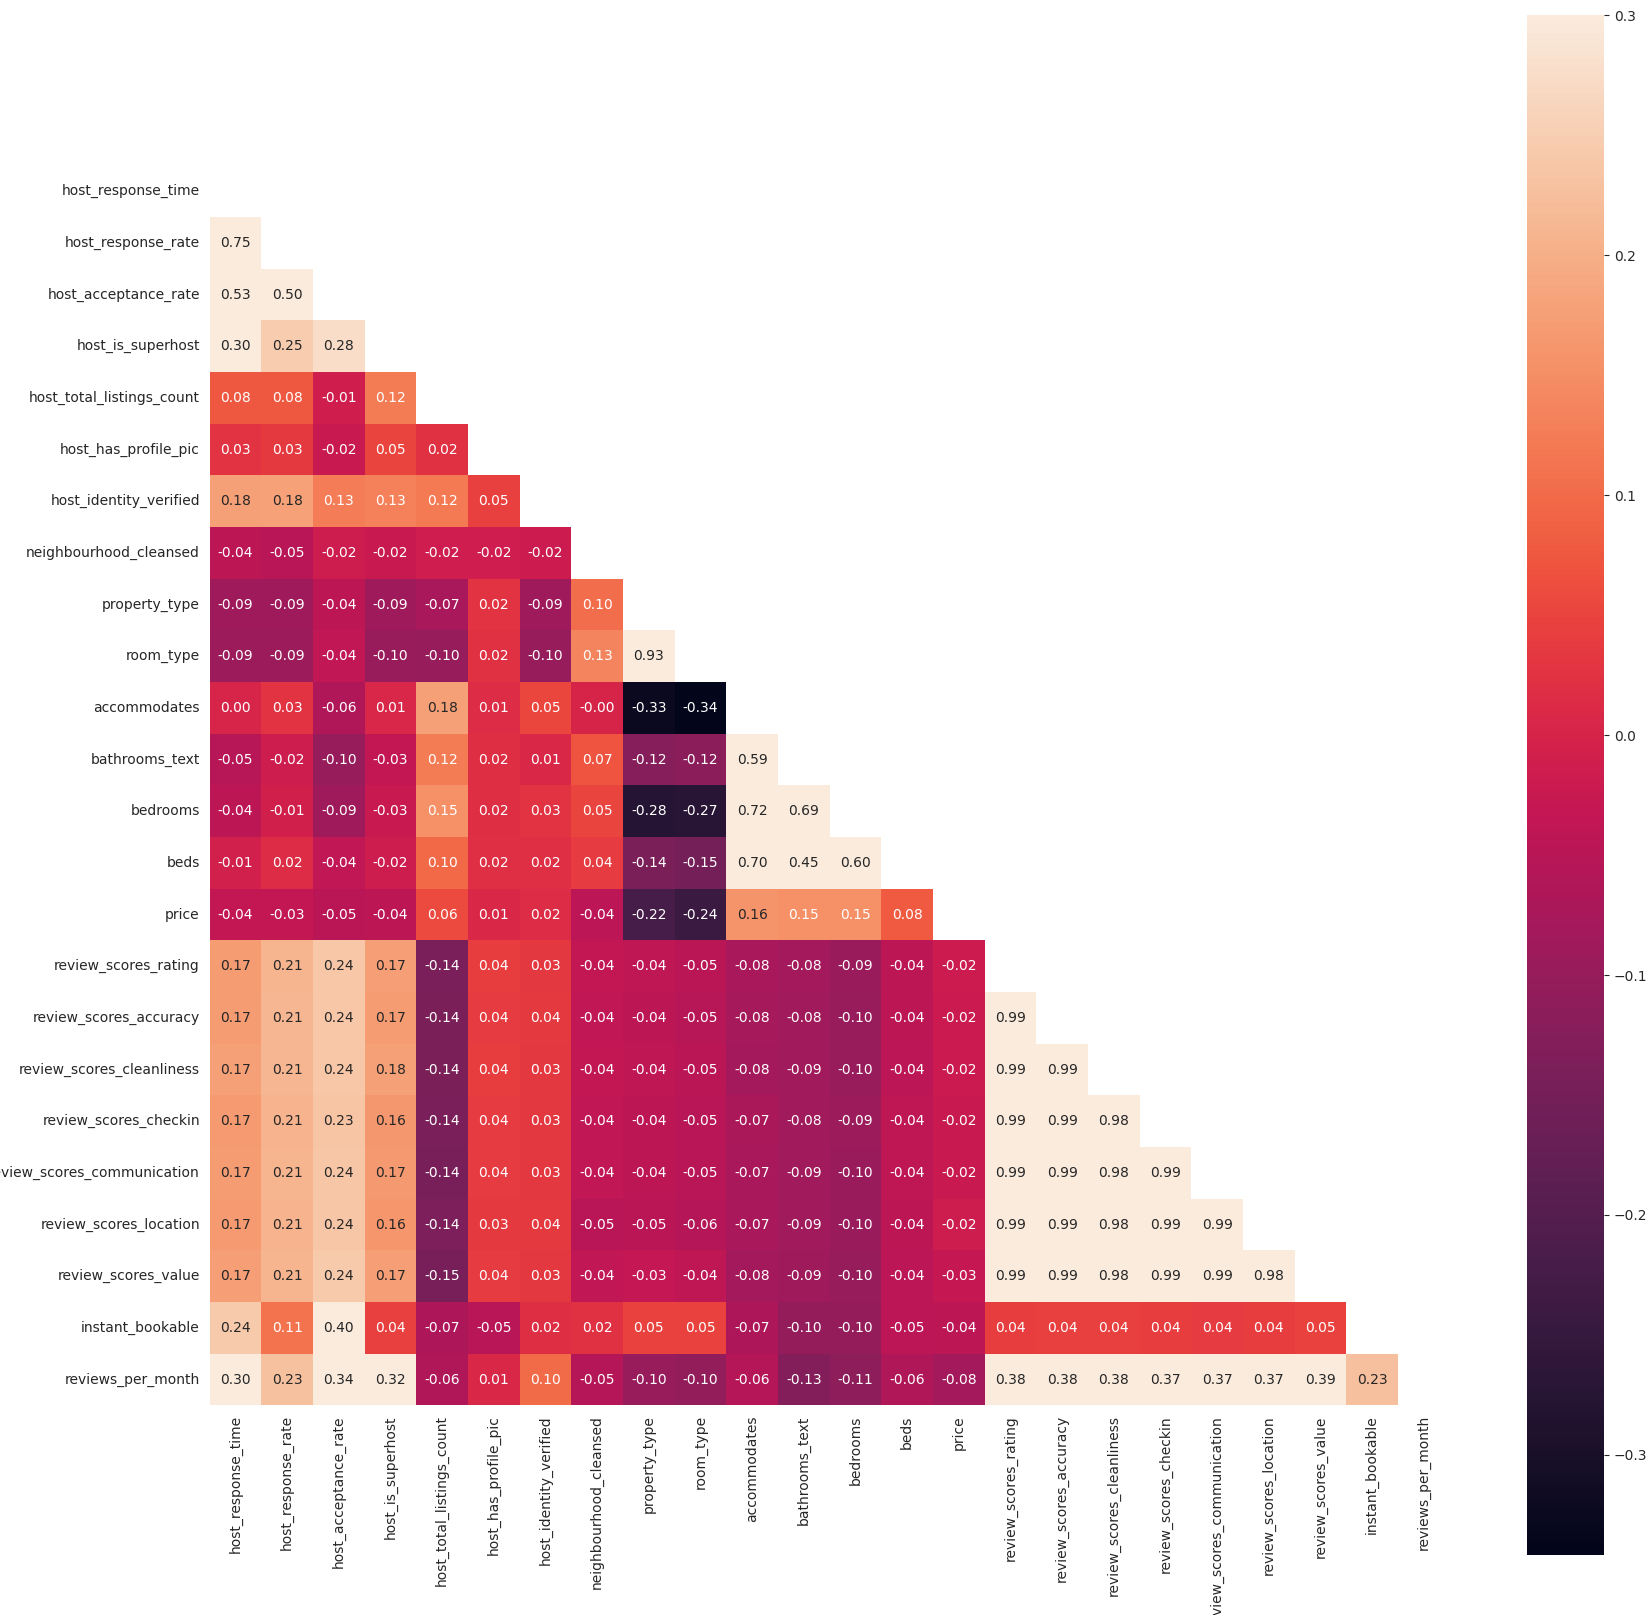

In [459]:
mask = np.zeros_like(corrmat)
"""
Plot the correlation matrix for the data.
@param corrmat - the correlation matrix for the data.
"""
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(20,20))
    ax = sns.heatmap(corrmat, mask=mask, vmax=.3, square=True, annot=True, fmt='.2f')

In [460]:
clean_listing.drop(['latitude','longitude'], axis=1, inplace=True)

/var/folders/sb/01h9w7kd6pd17pjzy_5jc4gw0000gn/T/ipykernel_77389/752591969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_listing.drop(['latitude','longitude'], axis=1, inplace=True)


In [461]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [462]:

"""
Split the data into training and test data. We are using the train_test_split function from sklearn.model_selection.
@param X - the dataframe containing the features           
@param y - the dataframe containing the labels           
@param test_size - the percentage of the data to be used for testing           
@param random_state - the random seed used for shuffling           
@returns X_train, X_test, y_train, y_test           
"""
X = clean_listing.iloc[:,1:24]
y = clean_listing.iloc[:,-1]

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
  

In [463]:
from sklearn.ensemble import RandomForestRegressor
"""
Train a random forest model on the training data and test it on the test data.
@param X_train - the training data features
@param y_train - the training data labels
@param X_test - the test data features
@param y_test - the test data labels
@returns the r2 value, the mse value, and the rmse value
"""

# Train the regressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)  

# Make predictions on the test set
Y_pred = regressor.predict(X_test)

# Compute the R squared value
r2 = r2_score(y_test, Y_pred)
print("R squared value:", r2)

# Compute the mean squared error
mse = mean_squared_error(y_test, Y_pred)
print("Mean squared error:", mse)

# Compute the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
print("Root mean squared error:", rmse)

R squared value: 0.4182888837255516
Mean squared error: 0.6106724150816789
Root mean squared error: 0.7814553186725898


In [464]:
from sklearn.linear_model import Lasso
# Train the regressor
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Make predictions on the test set
Y_pred = lasso.predict(X_test)

# Compute the R squared value
r2 = r2_score(y_test, Y_pred)
print("R squared value:", r2)

# Compute the mean squared error
mse = mean_squared_error(y_test, Y_pred)
print("Mean squared error:", mse)

# Compute the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
print("Root mean squared error:", rmse)



R squared value: 0.1986356697468139
Mean squared error: 0.8412613705067009
Root mean squared error: 0.9172030148809482


In [465]:
from sklearn.linear_model import LinearRegression

# Train the regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
Y_pred = regressor.predict(X_test)

# Compute the R squared value
r2 = r2_score(y_test, Y_pred)
print("R squared value:", r2)

# Compute the mean squared error
mse = mean_squared_error(y_test, Y_pred)
print("Mean squared error:", mse)

# Compute the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
print("Root mean squared error:", rmse)




R squared value: 0.29158141446080066
Mean squared error: 0.7436881923292417
Root mean squared error: 0.862373580491217


#### OLS

In [466]:
"""
    Use the statsmodels library to fit a linear regression model to the data.
    @param clean_listing - the cleaned listing dataframe
    @returns the results of the regression model
    """

results = smf.ols('reviews_per_month ~ bedrooms+host_response_time+host_response_rate+host_acceptance_rate+host_is_superhost+host_total_listings_count+host_has_profile_pic+host_identity_verified+property_type+room_type+accommodates+bathrooms_text+bedrooms+beds+price+review_scores_rating+review_scores_accuracy+review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location+review_scores_value+instant_bookable', data=clean_listing).fit()    


In [467]:
clean_listing['review_scores_location']=clean_listing['review_scores_location'].fillna(0)

/var/folders/sb/01h9w7kd6pd17pjzy_5jc4gw0000gn/T/ipykernel_77389/2322523013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_listing['review_scores_location']=clean_listing['review_scores_location'].fillna(0)


In [468]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      reviews_per_month   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     56.87
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:42:34   Log-Likelihood:                -21135.
No. Observations:               17301   AIC:                         4.255e+04
Df Residuals:                   17163   BIC:                         4.362e+04
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.8579      0.357     -2.405      0.016      -1.557      -0.159
host_response_time[T.1]        -0.0834      0.049     -1.687      0.092      -0.180       0.014
host_response_time[T.2]        -0.0146      0.057     -0.257      0.797      -0.126       0.097
host_response_time[T.3]         0.1670      0.058      2.865      0.004       0.053       0.281
host_is_superhost[T.1]          0.4327      0.016     27.358      0.000       0.402       0.464
host_has_profile_pic[T.1]      -0.0092      0.069     -0.133      0.894      -0.145       0.127
host_identity_verified[T.1]     0.0796      0.017      4.820      0.000       0.047       0.112
property_type[T.1]              0.1134      0.870      0.130      0.896      -1.592       1.819
property_type[T.2]              0.5792      0.402      1.441      0.150      -0.209       1.367
property_type[T.3]              0.4888      0.468      1.044      0.297      -0.429       1.407
property_type[T.4]              0.8832      0.497      1.779      0.075      -0.090       1.857
property_type[T.5]              0.6673      0.391      1.709      0.087      -0.098       1.433
property_type[T.6]              0.3814      0.437      0.874      0.382      -0.474       1.237
property_type[T.7]              0.3858      0.278      1.388      0.165      -0.159       0.930
property_type[T.8]              0.3044      0.314      0.971      0.332      -0.310       0.919
property_type[T.9]              0.1217      0.303      0.402      0.687      -0.471       0.715
property_type[T.10]             0.2329      0.298      0.782      0.434      -0.351       0.817
property_type[T.11]             0.3625      0.279      1.301      0.193      -0.184       0.908
property_type[T.12]             0.5968      0.646      0.923      0.356      -0.670       1.864
property_type[T.13]             0.7227      0.280      2.582      0.010       0.174       1.271
property_type[T.14]             0.1494      0.354      0.422      0.673      -0.544       0.843
property_type[T.15]             0.3711      0.277      1.339      0.181      -0.172       0.914
property_type[T.16]             0.5788      0.279      2.073      0.038       0.032       1.126
property_type[T.17]             0.1731      0.392      0.442      0.659      -0.594       0.941
property_type[T.18]             0.3917      0.312      1.256      0.209      -0.220       1.003
property_type[T.19]             0.1876      0.301      0.623      0.533      -0.403       0.778
property_type[T.20]             0.1772      0.877      0.202      0.840      -1.541       1.896
property_type[T.21]             0.0376      0.429      0.088      0.930      -0.804       0.879
property_type[T.22]            -0.2398      0.396     -0.606      0.545      -1.016       0.536
property_ty

In [469]:
keep_pvals = results.pvalues[results.pvalues <= .05]
keep_pvals

Intercept                       1.620001e-02
host_response_time[T.3]         4.170686e-03
host_is_superhost[T.1]         2.473206e-161
host_identity_verified[T.1]     1.445693e-06
property_type[T.13]             9.837988e-03
property_type[T.16]             3.815671e-02
instant_bookable[T.1]           5.857092e-59
bedrooms                        3.454224e-05
host_acceptance_rate            2.574588e-35
host_total_listings_count       6.995643e-11
accommodates                    6.588300e-06
price                           7.665981e-18
review_scores_checkin           1.750821e-04
review_scores_communication     2.681899e-03
review_scores_location          2.336319e-04
review_scores_value             4.439958e-33
dtype: float64

In [470]:
"""
    Group the listings by neighbourhood and bedroom count, aggregate the counts and mean reviews and prices.
    @param clean_listing - the cleaned listing dataframe
    @returns the aggregated dataframe
"""
count3=clean_listing.groupby(['neighbourhood_cleansed','bedrooms']) \
       .agg(count=('neighbourhood_cleansed','size'), mean_review=('reviews_per_month', 'mean'),mean_price=('price','mean')) \
       .reset_index()

In [471]:
count3

,neighbourhood_cleansed,bedrooms,count,mean_review,mean_price
0,0,1.0,11,0.690909,170.363636
1,0,2.0,5,0.654000,358.200000
2,0,3.0,1,1.760000,434.000000
3,0,4.0,0,NaN,NaN
4,0,5.0,1,0.260000,1.000000
...,...,...,...,...,...
2171,135,12.0,0,NaN,NaN
2172,135,15.0,0,NaN,NaN
2173,135,17.0,0,NaN,NaN
2174,135,20.0,0,NaN,NaN


In [472]:
"""
    Merge the listings with the count3 dataframe. This will allow us to calculate the average price per night for each listing.
    @param clean_listing - the listings dataframe           
    @param count3 - the count3 dataframe           
    @return The listings dataframe with the average price per night added.           
"""

clean_listing = clean_listing.merge(count3, how='left', left_on=['neighbourhood_cleansed', 'bedrooms'], right_on=['neighbourhood_cleansed', 'bedrooms'])    


In [473]:
clean_listing


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,count,mean_review,mean_price
0,15965441,3,0.83,0.00,0,3.0,1,1,23,40,...,0.00,0.00,0.00,0.00,0.00,0,0.00,4,0.000000,152.500000
1,47908784,1,0.50,1.00,0,1.0,1,0,39,7,...,0.00,0.00,0.00,0.00,0.00,0,0.00,23,0.306087,248.478261
2,52239613,1,1.00,0.89,0,0.0,1,0,29,15,...,5.00,4.89,4.78,4.78,4.89,0,1.16,6,0.205000,345.000000
3,10445855,3,1.00,1.00,0,2.0,1,1,132,11,...,4.89,4.93,4.87,4.70,4.57,0,0.64,1,0.640000,145.000000
4,5.65405E+17,3,1.00,0.67,0,0.0,1,1,30,22,...,0.00,0.00,0.00,0.00,0.00,0,0.00,6,0.200000,170.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17296,54032578,3,1.00,0.93,0,0.0,1,1,19,13,...,5.00,5.00,5.00,4.93,5.00,0,2.46,378,0.997751,177.222222
17297,54183633,2,1.00,0.98,0,0.0,1,1,14,16,...,5.00,4.25,3.50,4.75,3.75,0,0.78,137,1.202190,257.620438
17298,23033490,3,1.00,0.98,1,3.0,1,1,67,40,...,4.92,4.98,4.98,5.00,4.94,0,1.47,216,0.665833,212.726852
17299,2341248,0,0.00,1.00,0,1.0,1,0,10,15,...,4.17,4.83,5.00,4.67,4.33,0,0.10,168,0.552679,331.130952


In [474]:
"""
    Create a new column in the clean listing dataframe that is true if the mean price is greater than the price + buffer.
    Create a new column in the clean listing dataframe that is true if the mean price is less than the price - buffer.
    @param clean_listing - the clean listing dataframe
    @returns the clean listing dataframe with the new columns added
"""
buffer = 50
clean_listing['priceg100'] = clean_listing['mean_price'] > (clean_listing['price'] + buffer)
clean_listing['pricel100'] = clean_listing['mean_price'] < (clean_listing['price'] - buffer)

In [475]:
clean_listing

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,count,mean_review,mean_price,priceg100,pricel100
0,15965441,3,0.83,0.00,0,3.0,1,1,23,40,...,0.00,0.00,0.00,0,0.00,4,0.000000,152.500000,False,False
1,47908784,1,0.50,1.00,0,1.0,1,0,39,7,...,0.00,0.00,0.00,0,0.00,23,0.306087,248.478261,False,True
2,52239613,1,1.00,0.89,0,0.0,1,0,29,15,...,4.78,4.78,4.89,0,1.16,6,0.205000,345.000000,False,False
3,10445855,3,1.00,1.00,0,2.0,1,1,132,11,...,4.87,4.70,4.57,0,0.64,1,0.640000,145.000000,False,False
4,5.65405E+17,3,1.00,0.67,0,0.0,1,1,30,22,...,0.00,0.00,0.00,0,0.00,6,0.200000,170.833333,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17296,54032578,3,1.00,0.93,0,0.0,1,1,19,13,...,5.00,4.93,5.00,0,2.46,378,0.997751,177.222222,False,False
17297,54183633,2,1.00,0.98,0,0.0,1,1,14,16,...,3.50,4.75,3.75,0,0.78,137,1.202190,257.620438,True,False
17298,23033490,3,1.00,0.98,1,3.0,1,1,67,40,...,4.98,5.00,4.94,0,1.47,216,0.665833,212.726852,True,False
17299,2341248,0,0.00,1.00,0,1.0,1,0,10,15,...,5.00,4.67,4.33,0,0.10,168,0.552679,331.130952,False,True


In [476]:
clean_listing1 = clean_listing[:]
clean_listing2 = clean_listing[:]

In [477]:
print('clean_listing',id(clean_listing))
print('clean_listing1', id(clean_listing1))
print('clean_listing2',id(clean_listing2))

clean_listing 6042968128
clean_listing1 6087960368
clean_listing2 6087962048


In [478]:
""" 
Calulate the mean reviews per month for a lsiting and use a buffer of $100 to classify properties that are priced well vs overpriced
"""

clean_listing[clean_listing['pricel100'] == True]['reviews_per_month'].mean()

0.49864817347138113

In [479]:
clean_listing[clean_listing['priceg100'] == True]['reviews_per_month'].mean()

0.8309257940464321

bleh

In [480]:
x_plots = []
y_g_plots = []
y_l_plots = []
for i in range(400):
    buffer = i
    x_plots.append(i)
    clean_listing['priceg100'] = clean_listing['mean_price'] > (clean_listing['price'] + buffer)
    clean_listing['pricel100'] = clean_listing['mean_price'] < (clean_listing['price'] - buffer)
    y_l_plots.append(clean_listing[clean_listing['pricel100'] == True]['reviews_per_month'].mean())
    y_g_plots.append(clean_listing[clean_listing['priceg100'] == True]['reviews_per_month'].mean())

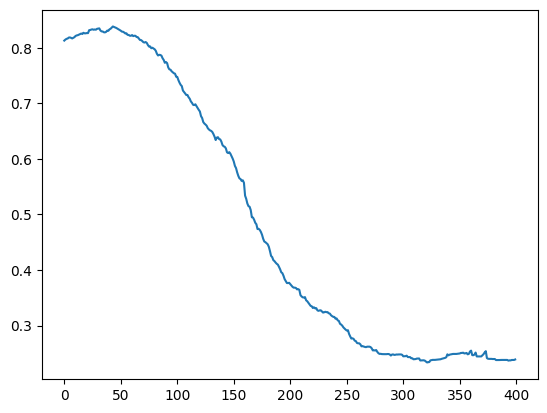

In [481]:
plt.plot(x_plots, y_g_plots)


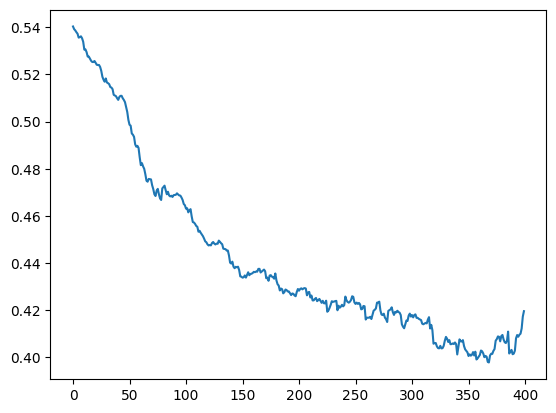

In [482]:
plt.plot(x_plots, y_l_plots)


plt.plot(x_plots, y_g_plots)


In [483]:
clean_listing1

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,count,mean_review,mean_price,priceg100,pricel100
0,15965441,3,0.83,0.00,0,3.0,1,1,23,40,...,0.00,0.00,0.00,0,0.00,4,0.000000,152.500000,False,False
1,47908784,1,0.50,1.00,0,1.0,1,0,39,7,...,0.00,0.00,0.00,0,0.00,23,0.306087,248.478261,False,True
2,52239613,1,1.00,0.89,0,0.0,1,0,29,15,...,4.78,4.78,4.89,0,1.16,6,0.205000,345.000000,False,False
3,10445855,3,1.00,1.00,0,2.0,1,1,132,11,...,4.87,4.70,4.57,0,0.64,1,0.640000,145.000000,False,False
4,5.65405E+17,3,1.00,0.67,0,0.0,1,1,30,22,...,0.00,0.00,0.00,0,0.00,6,0.200000,170.833333,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17296,54032578,3,1.00,0.93,0,0.0,1,1,19,13,...,5.00,4.93,5.00,0,2.46,378,0.997751,177.222222,False,False
17297,54183633,2,1.00,0.98,0,0.0,1,1,14,16,...,3.50,4.75,3.75,0,0.78,137,1.202190,257.620438,True,False
17298,23033490,3,1.00,0.98,1,3.0,1,1,67,40,...,4.98,5.00,4.94,0,1.47,216,0.665833,212.726852,True,False
17299,2341248,0,0.00,1.00,0,1.0,1,0,10,15,...,5.00,4.67,4.33,0,0.10,168,0.552679,331.130952,False,True


In [484]:
clean_listing1 = clean_listing.iloc[:,:25]

In [485]:
count4=clean_listing1.groupby(['neighbourhood_cleansed']) \
       .agg(count=('neighbourhood_cleansed','size'), mean_review=('reviews_per_month', 'mean'),mean_price=('price','mean')) \
       .reset_index()


In [486]:
clean_listing1 = clean_listing1.merge(count4, how='left', left_on=['neighbourhood_cleansed'], right_on=['neighbourhood_cleansed'])    


In [487]:
buffer = 50
clean_listing1['priceg100'] = clean_listing1['mean_price'] > (clean_listing1['price'] + buffer)
clean_listing1['pricel100'] = clean_listing1['mean_price'] < (clean_listing1['price'] - buffer)

In [488]:
clean_listing1[clean_listing1['priceg100'] == True]['reviews_per_month'].mean()

0.812144881113712

In [489]:
clean_listing1[clean_listing1['pricel100'] == True]['reviews_per_month'].mean()

0.49008767021078153

In [490]:
clean_listing2 = clean_listing.iloc[:,:25]

In [491]:
count5=clean_listing2.groupby(['bedrooms']) \
       .agg(count=('bedrooms','size'), mean_review=('reviews_per_month', 'mean'),mean_price=('price','mean')) \
       .reset_index()


In [492]:
clean_listing2 = clean_listing2.merge(count5, how='left', left_on=['bedrooms'], right_on=['bedrooms'])    


In [493]:
buffer = 50
clean_listing2['priceg100'] = clean_listing2['mean_price'] > (clean_listing2['price'] + buffer)
clean_listing2['pricel100'] = clean_listing2['mean_price'] < (clean_listing2['price'] - buffer)

In [494]:
clean_listing2[clean_listing2['priceg100'] == True]['reviews_per_month'].mean()

0.7799987116722494

In [495]:
clean_listing2[clean_listing2['pricel100'] == True]['reviews_per_month'].mean()

0.5253864425360862

In [496]:
X1=clean_listing[['bedrooms','accommodates']]

In [497]:
Y1=clean_listing[['reviews_per_month']]

In [498]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1,
                                                    random_state=1)
  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X1_train, Y1_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)

Coefficients:  [[-0.13664246  0.01743038]]


In [499]:
Y_pred=reg.predict(X1_test)
mean_squared_error(Y_pred,Y1_test)

1.0361726135597682